In [3]:
#Start by importing the required packages

In [4]:
#Importing the required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

In [5]:
#loading the data
df_tickets = pd.read_csv('/home/stush/Git/traffic_jam_Nairobi/train_revised.csv', low_memory=False)
df_tickets.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [6]:
group_by_ride_id = df_tickets.groupby(['ride_id']).size().to_frame(name='num_tickets').reset_index()
group_by_ride_id.head()

,ride_id,num_tickets
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [7]:
df_new_tickets = df_tickets.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis = 1)
df_new_tickets.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity
0,1442,17-10-17,7:15,Migori,Bus,49
1,5437,19-11-17,7:12,Migori,Bus,49
2,5710,26-11-17,7:05,Keroka,Bus,49
3,5777,27-11-17,7:10,Homa Bay,Bus,49
4,5778,27-11-17,7:12,Migori,Bus,49


In [8]:
df_new_tickets.drop_duplicates(inplace=True)

In [9]:
df_combined = pd.merge(group_by_ride_id,df_new_tickets,on='ride_id',how = 'left')
df_combined.head()

,ride_id,num_tickets,travel_date,travel_time,travel_from,car_type,max_capacity
0,1442,1,17-10-17,7:15,Migori,Bus,49
1,5437,1,19-11-17,7:12,Migori,Bus,49
2,5710,1,26-11-17,7:05,Keroka,Bus,49
3,5777,5,27-11-17,7:10,Homa Bay,Bus,49
4,5778,31,27-11-17,7:12,Migori,Bus,49


In [10]:
import re
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [11]:
df_try = df_combined

In [12]:
add_datepart(df_try,'travel_date',drop = True)

In [13]:
df_try.head()

,ride_id,num_tickets,travel_time,travel_from,car_type,max_capacity,travel_Year,travel_Month,travel_Week,travel_Day,travel_Dayofweek,travel_Dayofyear,travel_Is_month_end,travel_Is_month_start,travel_Is_quarter_end,travel_Is_quarter_start,travel_Is_year_end,travel_Is_year_start,travel_Elapsed
0,1442,1,7:15,Migori,Bus,49,2017,10,42,17,1,290,False,False,False,False,False,False,1508198400
1,5437,1,7:12,Migori,Bus,49,2017,11,46,19,6,323,False,False,False,False,False,False,1511049600
2,5710,1,7:05,Keroka,Bus,49,2017,11,47,26,6,330,False,False,False,False,False,False,1511654400
3,5777,5,7:10,Homa Bay,Bus,49,2017,11,48,27,0,331,False,False,False,False,False,False,1511740800
4,5778,31,7:12,Migori,Bus,49,2017,11,48,27,0,331,False,False,False,False,False,False,1511740800


In [14]:
df_try.shape

(6249, 19)

In [15]:
df_try['travel_Is_month_end'].value_counts()

False    6073
True      176
Name: travel_Is_month_end, dtype: int64

In [16]:
def valuecount(fld):
   return df_try[fld].value_counts()

In [17]:
valuecount('travel_Is_month_start')

False    5982
True      267
Name: travel_Is_month_start, dtype: int64

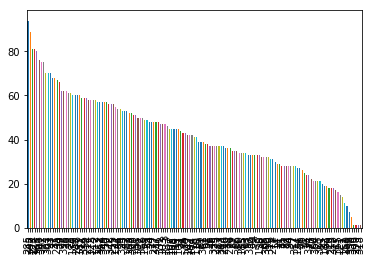

In [18]:
valuecount('travel_Dayofyear').plot.bar()

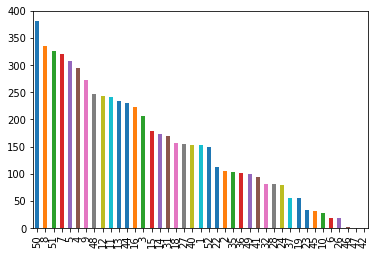

In [19]:
valuecount('travel_Week').plot.bar()

In [20]:
valuecount('travel_Week')

50    381
8     335
51    325
7     321
5     307
4     294
9     272
48    246
12    243
11    242
13    234
44    230
16    223
3     207
15    179
14    173
31    170
18    157
27    154
40    152
1     152
52    149
22    112
2     105
35    104
36    102
49     99
41     94
32     81
28     81
24     80
37     56
19     55
23     33
45     31
10     28
6      19
26     19
46      2
47      1
42      1
Name: travel_Week, dtype: int64

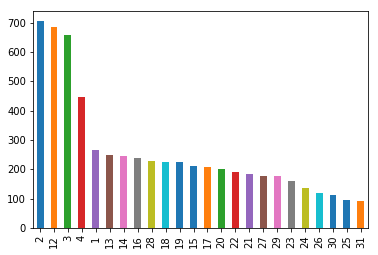

In [21]:
valuecount('travel_Day').plot.bar()
#For some reason most people travel at the start of the month

In [22]:
df_try['travel_time'] = pd.to_datetime(df_try['travel_time'],infer_datetime_format = True)

In [23]:
df_new = df_try.assign(session=pd.cut(df_try.travel_time.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))

In [24]:
df_new.shape

(6249, 20)

In [25]:
y= df_new['num_tickets']

In [26]:
df_model = df_new.drop(['ride_id','max_capacity','travel_Elapsed','travel_time','num_tickets'],1)

In [27]:
df_model.shape

(6249, 15)

In [28]:
df_model.head()

,travel_from,car_type,travel_Year,travel_Month,travel_Week,travel_Day,travel_Dayofweek,travel_Dayofyear,travel_Is_month_end,travel_Is_month_start,travel_Is_quarter_end,travel_Is_quarter_start,travel_Is_year_end,travel_Is_year_start,session
0,Migori,Bus,2017,10,42,17,1,290,False,False,False,False,False,False,Morning
1,Migori,Bus,2017,11,46,19,6,323,False,False,False,False,False,False,Morning
2,Keroka,Bus,2017,11,47,26,6,330,False,False,False,False,False,False,Morning
3,Homa Bay,Bus,2017,11,48,27,0,331,False,False,False,False,False,False,Morning
4,Migori,Bus,2017,11,48,27,0,331,False,False,False,False,False,False,Morning


In [29]:
l = ['car_type','travel_Year','travel_Is_month_end','travel_Is_month_start',
     'travel_Is_quarter_end','travel_Is_quarter_start','travel_Is_year_end','travel_Is_year_start','session']

In [30]:
df_final = pd.get_dummies(data = df_model,columns = l)

In [31]:
df_final.head()

,travel_from,travel_Month,travel_Week,travel_Day,travel_Dayofweek,travel_Dayofyear,car_type_Bus,car_type_shuttle,travel_Year_2017,travel_Year_2018,...,travel_Is_quarter_start_False,travel_Is_quarter_start_True,travel_Is_year_end_False,travel_Is_year_end_True,travel_Is_year_start_False,travel_Is_year_start_True,session_Night,session_Morning,session_Afternoon,session_Evening
0,Migori,10,42,17,1,290,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
1,Migori,11,46,19,6,323,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
2,Keroka,11,47,26,6,330,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
3,Homa Bay,11,48,27,0,331,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
4,Migori,11,48,27,0,331,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0


In [32]:
df_final['travel_from'] = ['most_pop' if i == 'Kisii' else 'Other' for i in df_final['travel_from']]

In [33]:
X_new = pd.get_dummies(df_final,columns = ['travel_from'])

In [34]:
X_new.head()

,travel_Month,travel_Week,travel_Day,travel_Dayofweek,travel_Dayofyear,car_type_Bus,car_type_shuttle,travel_Year_2017,travel_Year_2018,travel_Is_month_end_False,...,travel_Is_year_end_False,travel_Is_year_end_True,travel_Is_year_start_False,travel_Is_year_start_True,session_Night,session_Morning,session_Afternoon,session_Evening,travel_from_Other,travel_from_most_pop
0,10,42,17,1,290,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
1,11,46,19,6,323,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
2,11,47,26,6,330,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
3,11,48,27,0,331,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,11,48,27,0,331,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0


In [35]:
X = X_new.drop(['travel_Is_quarter_end_True', 'travel_Is_quarter_start_True',
       'travel_Is_year_end_True', 'travel_Is_year_start_True',
       'travel_Year_2017'],1)

In [36]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

In [37]:
def add_interactions(df):
    #Get feature names
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns)+['_'.join(x) for x in combos]
    
    #find interactions
    poly = PolynomialFeatures(interaction_only = True,include_bias = False)
    df = poly.fit_transform(df)
    df=pd.DataFrame(df)
    df.columns = colnames
    
    #remove intercation terms with all 0 values
    noint_indicies = [i for i,x in enumerate(list((df==0).all())) if x]
    df = df.drop(df.columns[noint_indicies],axis = 1)
    
    return df

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 22 columns):
travel_Month                     6249 non-null int64
travel_Week                      6249 non-null int64
travel_Day                       6249 non-null int64
travel_Dayofweek                 6249 non-null int64
travel_Dayofyear                 6249 non-null int64
car_type_Bus                     6249 non-null uint8
car_type_shuttle                 6249 non-null uint8
travel_Year_2018                 6249 non-null uint8
travel_Is_month_end_False        6249 non-null uint8
travel_Is_month_end_True         6249 non-null uint8
travel_Is_month_start_False      6249 non-null uint8
travel_Is_month_start_True       6249 non-null uint8
travel_Is_quarter_end_False      6249 non-null uint8
travel_Is_quarter_start_False    6249 non-null uint8
travel_Is_year_end_False         6249 non-null uint8
travel_Is_year_start_False       6249 non-null uint8
session_Night                    6249 non-nul

In [39]:
df_final_train = add_interactions(X)

In [41]:
x1 = df_final_train.drop(['travel_Dayofweek_travel_Is_month_end_True'],1)

In [42]:
x1.shape

(6249, 221)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,train_size = 0.70,random_state= 1)

/home/stush/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [45]:
x1_train.head()

,travel_Month,travel_Week,travel_Day,travel_Dayofweek,travel_Dayofyear,car_type_Bus,car_type_shuttle,travel_Year_2018,travel_Is_month_end_False,travel_Is_month_end_True,...,travel_Is_year_start_False_session_Morning,travel_Is_year_start_False_session_Evening,travel_Is_year_start_False_travel_from_Other,travel_Is_year_start_False_travel_from_most_pop,session_Night_travel_from_Other,session_Night_travel_from_most_pop,session_Morning_travel_from_Other,session_Morning_travel_from_most_pop,session_Evening_travel_from_Other,session_Evening_travel_from_most_pop
3256,10.0,40.0,2.0,1.0,275.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3554,12.0,51.0,21.0,3.0,355.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5038,3.0,11.0,16.0,4.0,75.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1406,2.0,7.0,18.0,6.0,49.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4964,3.0,11.0,14.0,2.0,73.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
import sklearn.feature_selection

In [47]:
select = sklearn.feature_selection.SelectKBest(k=100)
selected_features=select.fit(x1_train,y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [x1.columns[i] for i in indices_selected]

In [48]:
x1_train_selected= x1_train[colnames_selected]
x1_test_selected = x1_test[colnames_selected]

In [49]:
colnames_selected

['car_type_Bus',
 'car_type_shuttle',
 'session_Night',
 'session_Morning',
 'session_Evening',
 'travel_from_Other',
 'travel_from_most_pop',
 'travel_Month_car_type_Bus',
 'travel_Month_car_type_shuttle',
 'travel_Month_session_Night',
 'travel_Month_session_Morning',
 'travel_Month_session_Evening',
 'travel_Month_travel_from_Other',
 'travel_Month_travel_from_most_pop',
 'travel_Week_car_type_Bus',
 'travel_Week_car_type_shuttle',
 'travel_Week_session_Night',
 'travel_Week_session_Evening',
 'travel_Week_travel_from_Other',
 'travel_Week_travel_from_most_pop',
 'travel_Day_car_type_Bus',
 'travel_Day_car_type_shuttle',
 'travel_Day_session_Night',
 'travel_Day_session_Evening',
 'travel_Day_travel_from_Other',
 'travel_Day_travel_from_most_pop',
 'travel_Dayofweek_car_type_Bus',
 'travel_Dayofweek_car_type_shuttle',
 'travel_Dayofweek_session_Night',
 'travel_Dayofweek_session_Evening',
 'travel_Dayofweek_travel_from_Other',
 'travel_Dayofweek_travel_from_most_pop',
 'travel_Dayof

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [51]:
max_depth = 3
min_child_weight = 10
subsample = 0.5
colsample_bytree = 0.6
objective = 'reg:linear'
num_estimators = 1000
learning_rate = 0.3
modX = xgb.XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)

In [52]:
modX.fit(x1_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=3, min_child_weight=10, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5)

In [56]:
modX.feature_importance_

AttributeError: 'XGBRegressor' object has no attribute 'feature_importance_'

In [53]:
preds_XGBR = modX.predict(x1_test)

In [55]:
print (mean_absolute_error(preds_XGBR,y_test))

5.7590391404787695


In [ ]:
modG = GradientBoostingRegressor(loss = 'lad',learning_rate=0.1,n_estimators = 100,criterion = "mae")

In [201]:
modG.fit(x1_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
             learning_rate=0.1, loss='lad', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [202]:
i_sample_pred = modG.predict(x1_train)

In [203]:
print (mean_absolute_error(i_sample_pred,y_train))

4.767812938227325


In [204]:
preds_GBR = modG.predict(x1_test)

In [205]:
print (mean_absolute_error(preds_GBR,y_test))

5.1771362923049535


In [223]:
modE = ExtraTreesRegressor (n_estimators = 100, criterion = "mae")

In [224]:
modE.fit(x1_train,y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [226]:
pred_ExtR = modE.predict(x1_test)

In [227]:
print (mean_absolute_error(pred_ExtR,y_test))

5.326733333333333


In [102]:
df = pd.read_csv('/home/stush/Downloads/test_questions.csv', low_memory=False)

In [103]:
df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [104]:
add_datepart(df,'travel_date',drop = True)

In [105]:
df.head()

,ride_id,travel_time,travel_from,travel_to,car_type,max_capacity,travel_Year,travel_Month,travel_Week,travel_Day,travel_Dayofweek,travel_Dayofyear,travel_Is_month_end,travel_Is_month_start,travel_Is_quarter_end,travel_Is_quarter_start,travel_Is_year_end,travel_Is_year_start,travel_Elapsed
0,247,07:06,Kisii,Nairobi,Bus,49,2018,5,19,7,0,127,False,False,False,False,False,False,1525651200
1,256,11:08,Kisii,Nairobi,shuttle,11,2018,5,18,6,6,126,False,False,False,False,False,False,1525564800
2,275,05:00,Kisii,Nairobi,shuttle,11,2018,5,18,4,4,124,False,False,False,False,False,False,1525392000
3,285,09:10,Kisii,Nairobi,shuttle,11,2018,5,18,4,4,124,False,False,False,False,False,False,1525392000
4,286,09:20,Kisii,Nairobi,shuttle,11,2018,5,18,4,4,124,False,False,False,False,False,False,1525392000


In [106]:
df['travel_from'].value_counts()

Kisii        545
Rongo        115
Kijauri       79
Homa Bay      53
Awendo        44
Rodi          43
Migori        41
Nyachenge     34
Kehancha      32
Ndhiwa        29
Sirare        28
Mbita         25
Keroka        21
Oyugis        12
Sori          10
Name: travel_from, dtype: int64

In [107]:
df.shape

(1111, 19)

In [108]:
df['travel_time'] = pd.to_datetime(df['travel_time'],infer_datetime_format = True)

In [109]:
df_test_set = df.assign(session=pd.cut(df.travel_time.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))

In [110]:
df_test_set.head()

,ride_id,travel_time,travel_from,travel_to,car_type,max_capacity,travel_Year,travel_Month,travel_Week,travel_Day,travel_Dayofweek,travel_Dayofyear,travel_Is_month_end,travel_Is_month_start,travel_Is_quarter_end,travel_Is_quarter_start,travel_Is_year_end,travel_Is_year_start,travel_Elapsed,session
0,247,2018-12-02 07:06:00,Kisii,Nairobi,Bus,49,2018,5,19,7,0,127,False,False,False,False,False,False,1525651200,Morning
1,256,2018-12-02 11:08:00,Kisii,Nairobi,shuttle,11,2018,5,18,6,6,126,False,False,False,False,False,False,1525564800,Morning
2,275,2018-12-02 05:00:00,Kisii,Nairobi,shuttle,11,2018,5,18,4,4,124,False,False,False,False,False,False,1525392000,Night
3,285,2018-12-02 09:10:00,Kisii,Nairobi,shuttle,11,2018,5,18,4,4,124,False,False,False,False,False,False,1525392000,Morning
4,286,2018-12-02 09:20:00,Kisii,Nairobi,shuttle,11,2018,5,18,4,4,124,False,False,False,False,False,False,1525392000,Morning


In [111]:
df_test_set.shape

(1111, 20)

In [112]:
df_test_model = df_test_set.drop(['ride_id','max_capacity','travel_Elapsed','travel_time','travel_to'],1)

In [113]:
df_test_model.shape

(1111, 15)

In [114]:
df_test_model['travel_from']= ['most_pop' if x == 'Kisii' else 'Other' for x in df_test_model['travel_from'] ]

In [115]:
df_test_model.shape

(1111, 15)

In [116]:
c = ['car_type','travel_Year','travel_Is_month_end','travel_Is_month_start',
     'travel_Is_quarter_end','travel_Is_quarter_start','travel_Is_year_end','travel_Is_year_start','session','travel_from']

In [117]:
df_final_test = pd.get_dummies(data = df_test_model,columns = c)

In [118]:
df_final_test.head()

,travel_Month,travel_Week,travel_Day,travel_Dayofweek,travel_Dayofyear,car_type_Bus,car_type_shuttle,travel_Year_2018,travel_Is_month_end_False,travel_Is_month_end_True,...,travel_Is_quarter_end_False,travel_Is_quarter_start_False,travel_Is_year_end_False,travel_Is_year_start_False,session_Night,session_Morning,session_Afternoon,session_Evening,travel_from_Other,travel_from_most_pop
0,5,19,7,0,127,1,0,1,1,0,...,1,1,1,1,0,1,0,0,0,1
1,5,18,6,6,126,0,1,1,1,0,...,1,1,1,1,0,1,0,0,0,1
2,5,18,4,4,124,0,1,1,1,0,...,1,1,1,1,1,0,0,0,0,1
3,5,18,4,4,124,0,1,1,1,0,...,1,1,1,1,0,1,0,0,0,1
4,5,18,4,4,124,0,1,1,1,0,...,1,1,1,1,0,1,0,0,0,1


In [119]:
df_final_test.columns

Index(['travel_Month', 'travel_Week', 'travel_Day', 'travel_Dayofweek',
       'travel_Dayofyear', 'car_type_Bus', 'car_type_shuttle',
       'travel_Year_2018', 'travel_Is_month_end_False',
       'travel_Is_month_end_True', 'travel_Is_month_start_False',
       'travel_Is_month_start_True', 'travel_Is_quarter_end_False',
       'travel_Is_quarter_start_False', 'travel_Is_year_end_False',
       'travel_Is_year_start_False', 'session_Night', 'session_Morning',
       'session_Afternoon', 'session_Evening', 'travel_from_Other',
       'travel_from_most_pop'],
      dtype='object')

In [120]:
X.columns

Index(['travel_Month', 'travel_Week', 'travel_Day', 'travel_Dayofweek',
       'travel_Dayofyear', 'car_type_Bus', 'car_type_shuttle',
       'travel_Year_2018', 'travel_Is_month_end_False',
       'travel_Is_month_end_True', 'travel_Is_month_start_False',
       'travel_Is_month_start_True', 'travel_Is_quarter_end_False',
       'travel_Is_quarter_start_False', 'travel_Is_year_end_False',
       'travel_Is_year_start_False', 'session_Night', 'session_Morning',
       'session_Afternoon', 'session_Evening', 'travel_from_most_pop'],
      dtype='object')

In [195]:
print(X.shape)
print(df_final_test.shape)

(6249, 22)
(1111, 22)


In [194]:
X.columns.difference(df_final_test.columns)

Index([], dtype='object')

In [149]:
df_x_test = add_interactions(df_final_test)

In [206]:
df_x_test.shape

(1111, 221)

In [161]:
x1_train.columns.difference(df_x_test.columns)

Index(['travel_Dayofweek_travel_Is_month_end_True'], dtype='object')

In [163]:
X_test_selected = df_x_test[colnames_selected]

In [164]:
X_test_selected.shape

(1111, 100)

In [166]:
test_prediction_Forest = model.predict(df_x_test)

In [207]:
test_prediction_GBR = modG.predict(df_x_test)

In [208]:
predictionF = test_prediction_Forest.round()

In [172]:
f = {'ride_id': df["ride_id"], 'number_of_ticket': predictionF}
df_predictionF = pd.DataFrame(data=f)
df_predictionF = df_predictionF[['ride_id','number_of_ticket']]

In [173]:
df_predictionF.head()

,ride_id,number_of_ticket
0,247,3.0
1,256,7.0
2,275,4.0
3,285,7.0
4,286,7.0


In [174]:
df_predictionF.to_csv('/home/stush/Desktop/RandF.csv', index=False) #save to csv file

In [217]:
predictionG = test_prediction_GBR.astype(int)

In [218]:
g = {'ride_id': df["ride_id"], 'number_of_ticket': predictionG}
df_predictionG = pd.DataFrame(data=g)
df_predictionG = df_predictionG[['ride_id','number_of_ticket']]

In [219]:
df_predictionG.head()

,ride_id,number_of_ticket
0,247,3
1,256,9
2,275,1
3,285,9
4,286,9


In [220]:
df_predictionG.to_csv('/home/stush/Desktop/GBR_all_int.csv', index=False) #save to csv file